In [1]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [2]:
iris = load_iris()
x = iris.data
y = iris.target

print("The iris’ feature names: ", iris.feature_names)
print(x[:10])

print("The iris’ target names: ", iris.target_names)
print(y)

The iris’ feature names:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
The iris’ target names:  ['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [3]:
lr = LogisticRegression(multi_class = 'ovr')
lr.fit(x, y)

d:\anaconda3\envs\AI_Env\lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'ovr'


In [4]:
pred = lr.predict(x)
print(classification_report(y, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.96      0.90      0.93        50
           2       0.91      0.96      0.93        50

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150



In [5]:
matrix = confusion_matrix(y, pred)
matrix

array([[50,  0,  0],
       [ 0, 45,  5],
       [ 0,  2, 48]])

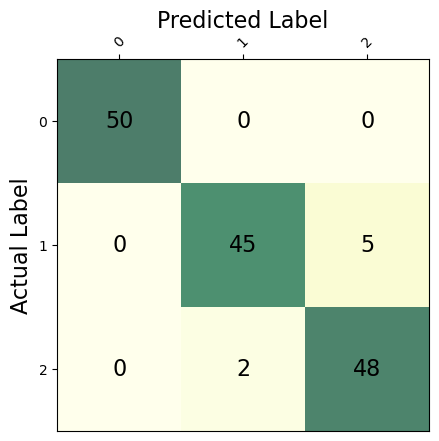

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline 

def show_confusion_matrix(cnf_matrix, class_labels):
    plt.matshow(cnf_matrix, cmap=plt.cm.YlGn, alpha = 0.7)
    ax = plt.gca() # Get Current Axes
    ax.set_xlabel('Predicted Label', fontsize =  16)
    ax.set_xticks(range(0, len(class_labels)))
    ax.set_xticklabels(class_labels, rotation = 45)
    ax.set_ylabel('Actual Label', fontsize = 16, rotation = 90)
    ax.set_yticks(range(0, len(class_labels)))
    ax.set_yticklabels(class_labels)
    ax.xaxis.set_label_position('top')
    ax.xaxis.tick_top()

    for row in range(len(cnf_matrix)): # 在Each grid cell displays a number
        for col in range(len(cnf_matrix[row])):
            ax.text(col, row, cnf_matrix[row][col], va = 'center', ha = 'center', fontsize = 16)
    
class_labels = [0,1,2]
show_confusion_matrix(matrix, class_labels)